<a href="https://colab.research.google.com/github/OswaldVc/AnaDat/blob/main/S2_EjercicioOptimizacionyAnalisisIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

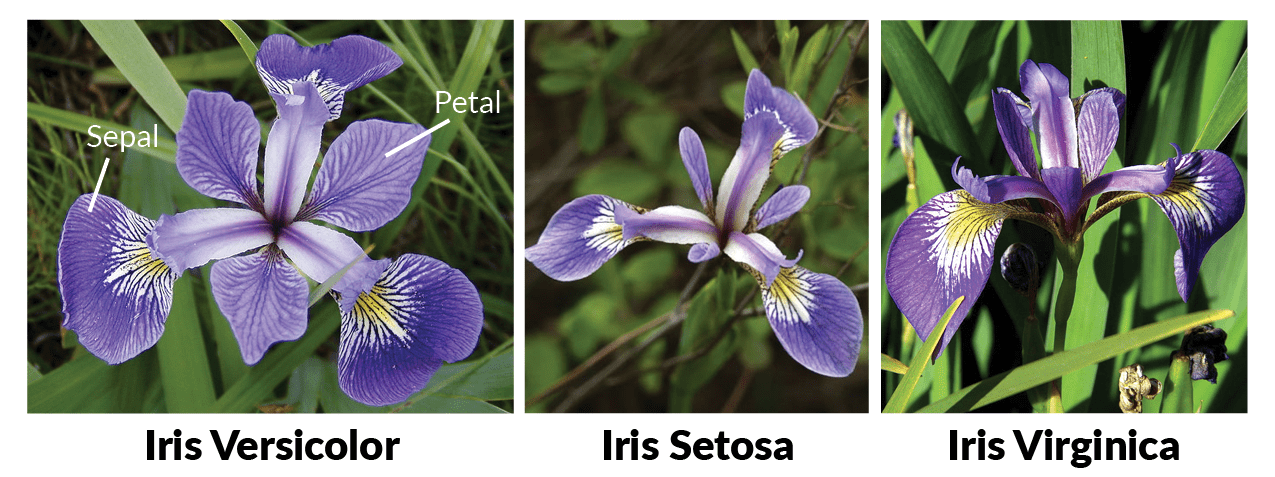

<p style="color:gray; text-align:center;">Imágen creditos: <a href="https://gadictos.com/iris-data-classification-using-neural-net/">gadictos</a></p>


  > **Titulo:** Análisis y Optimización de modelos                                                                
> **Nombre:** Néstor O. Vásquez
C.                                                                  
> **Fecha:** 01/04/2024                                             


<p align="justify">
El conjunto de datos de flores de Iris es uno de los conjuntos de datos más conocidos que se encuentran en la literatura de clasificación y entrenamiento de modelos. El objetivo es clasificar las flores de Iris entre tres especies (Setosa, Versicolor o Virginica) a partir de medidas de largo y ancho de sépalos y pétalos.
El conjunto de datos también conocido como Fisher's Iris Data contiene un conjunto de 150 registros bajo cinco atributos: longitud de pétalo, ancho de pétalo, longitud de sépalo, ancho de sépalo y especie, todas las medidas estan expresadas en centimetros.
<p/>

># **LIBRERÍAS DEL PROYECTO**

In [44]:
# Ignora las advertencias.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
################################################################################

# Visualización y manipulación de datos.
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

################################################################################

# Configurar
# Establece matplotlib en línea y muestra gráficos.
%matplotlib inline
from collections import OrderedDict
################################################################################

# Librerias de scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
################################################################################


# **CARGAR EL CONJUNTO DE DATOS**

In [2]:
# Se carga el dataset desde el repositorio Github y se leen los primeros 5 registro del conjunto de datos IRIS.
df=pd.read_csv('https://raw.githubusercontent.com/OswaldVc/AnaDat/main/Iris_Dataset.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **EXPLORANDO EL CONJUNTO DE DATOS**

In [3]:
# Validaciones previas del conjunto de datos, para observaciones respecto al tipo de datos, cantidad de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


>> *Como el marco de datos ya está indexado, eliminaremos la columna 'Id'.*

In [4]:
df.drop(['Id'],axis=1,inplace=True)
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


>> Ahora podemos verificar si alguna columna tiene valores nulos o 'Nan' o no.

In [5]:
# El método isnull().sum() aplicado a un DataFrame de Pandas se utiliza para
# detectar la presencia de valores nulos o faltantes en cada columna del DataFrame.
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# A continuación he enumerado el número de valores en cada columna.
for col in df.columns:
    print("Cantidad de datos por columna: " ,col,": ---->>",df[col].count())


Cantidad de datos por columna:  SepalLengthCm : ---->> 150
Cantidad de datos por columna:  SepalWidthCm : ---->> 150
Cantidad de datos por columna:  PetalLengthCm : ---->> 150
Cantidad de datos por columna:  PetalWidthCm : ---->> 150
Cantidad de datos por columna:  Species : ---->> 150


# **MATRIZ DE CORRELACIÓN LINEAL**

<p align="justify">
En resumen, este código te ayuda a visualizar cómo las variables numéricas en el conjunto de datos Iris están linealmente relacionadas entre sí, identificando posibles relaciones fuertes, tanto positivas como negativas, que podrían ser útiles para análisis posteriores, como la selección de características para modelos de aprendizaje automático.
<P/>

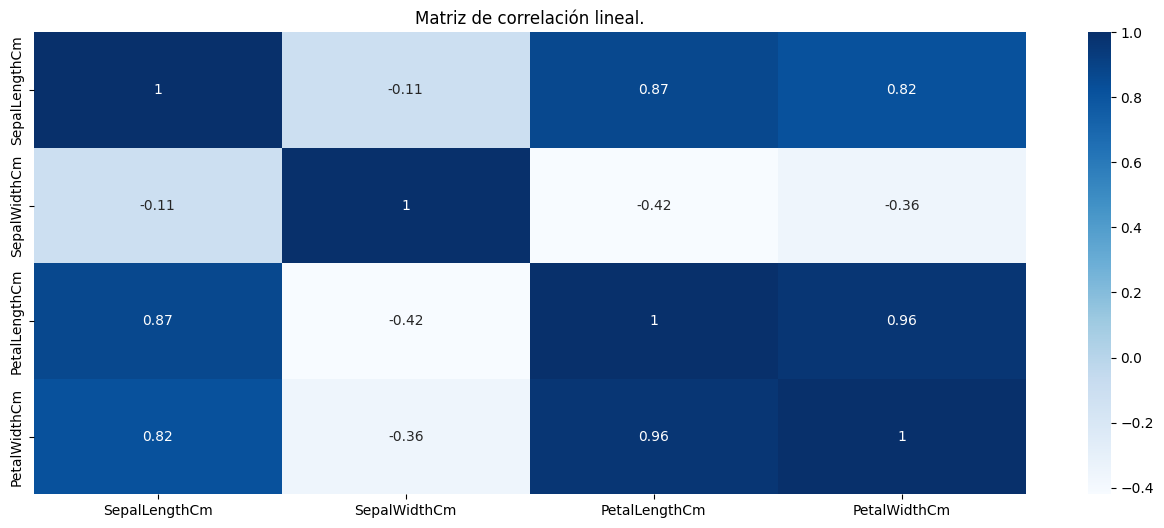

In [7]:
plt.figure(figsize = (16,6))
corr_mat = df.select_dtypes("number").corr()
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.title("Matriz de correlación lineal.")
plt.show()

>>> **Table de frecuencias por especie:**

In [8]:
colors = [
    "#B6D0E2",  # Azul claro
    "#A9C9FA",  # Azul cielo claro
    "#89B6E5",  # Azul pastel
    "#92A9BD",  # Azul polvo
    "#9FC4E7",  # Azul claro brillante
    "#AFDCEC",  # Azul agua marina claro
    "#D2E4FC"   # Azul bebé claro
]
background_color = "white"

In [54]:
def show_category_distribution(data_frame,
                               label_name,
                               colors,
                               exclude=[],
                               figsize=(18, 6),
                               d=[1, 2],
                               bg_color=background_color):
    """
    Visualiza la distribución de categorías en un DataFrame.

    Parameters:
    - data_frame (DataFrame): DataFrame que contiene los datos.
    - label_name (str): Nombre de la columna que representa la variable categórica.
    - colors (list): Lista de colores para la visualización.
    - exclude (list, optional): Lista de categorías a excluir de la visualización. Por defecto, [].
    - figsize (tuple, optional): Tamaño de la figura. Por defecto, (18, 6).
    - d (tuple, optional): Distribución de subgráficos en la figura. Por defecto, [1, 2].
    - bg_color (str, optional): Color de fondo de la figura. Por defecto, background_color.

    Returns:
    - None: La función muestra la distribución de categorías en un gráfico de barras y un gráfico circular.

    Example:
    show_category_distribution(data_frame, 'Species', colors=["#845EC2", "#D65DB1", "#FF6F91"])
    """

    # Calcula el conteo de cada categoría
    label_dict = data_frame[label_name].value_counts().to_dict()

    # Elimina las categorías excluidas
    for e in exclude:
        del label_dict[e]

    # Ordena el diccionario por el valor de conteo
    label_dict = OrderedDict(sorted(label_dict.items(), key=lambda label: label[1]))

    # Obtiene las clases y los valores de las categorías
    label_classes = label_dict.keys()
    label_values = label_dict.values()

    # Calcula la explosión para el gráfico circular
    explode = (0,) * (data_frame[label_name].nunique() - len(exclude))

    # Crea la figura y los ejes
    fig, ax = plt.subplots(d[0], d[1], facecolor=bg_color, figsize=figsize)

    # Gráfico de barras
    sns.countplot(data=data_frame,
                  x=label_name,
                  palette=colors,
                  edgecolor="black",
                  hatch="\\",
                  ax=ax[0],
                  linewidth=1,
                  order=data_frame[label_name].value_counts().index)

    # Configuración de títulos y etiquetas para el gráfico de barras
    ax[0].set_title(f"Distribución por \"{label_name}\"", size=14, fontweight="bold")
    ax[0].set_xlabel("Especie", size=10, fontweight="bold")
    ax[0].set_ylabel("Cantidad", size=10, fontweight="bold")
    ax[0].tick_params(axis="x", labelsize=9)
    ax[0].tick_params(axis="y", labelsize=9)
    ax[0].bar_label(ax[0].containers[0], fmt="%.0f", color="black", fontsize=9)

    # Gráfico circular
    plt.pie(label_values,
            explode=explode,
            labels=label_classes,
            autopct="%1.2f%%",
            shadow=True,
            startangle=90,
            textprops={"fontsize": 8, "fontweight": "bold", "color": "black"},
            wedgeprops={"edgecolor": "black"},
            colors=colors,
            labeldistance=1.1)

    # Configuración de títulos para el gráfico circular
    plt.title(f"Distribución por  \"{label_name}\". {','.join(exclude)} {'Excluded' if len(exclude) > 0 else ''}",
              fontweight="bold",
              fontsize=14)

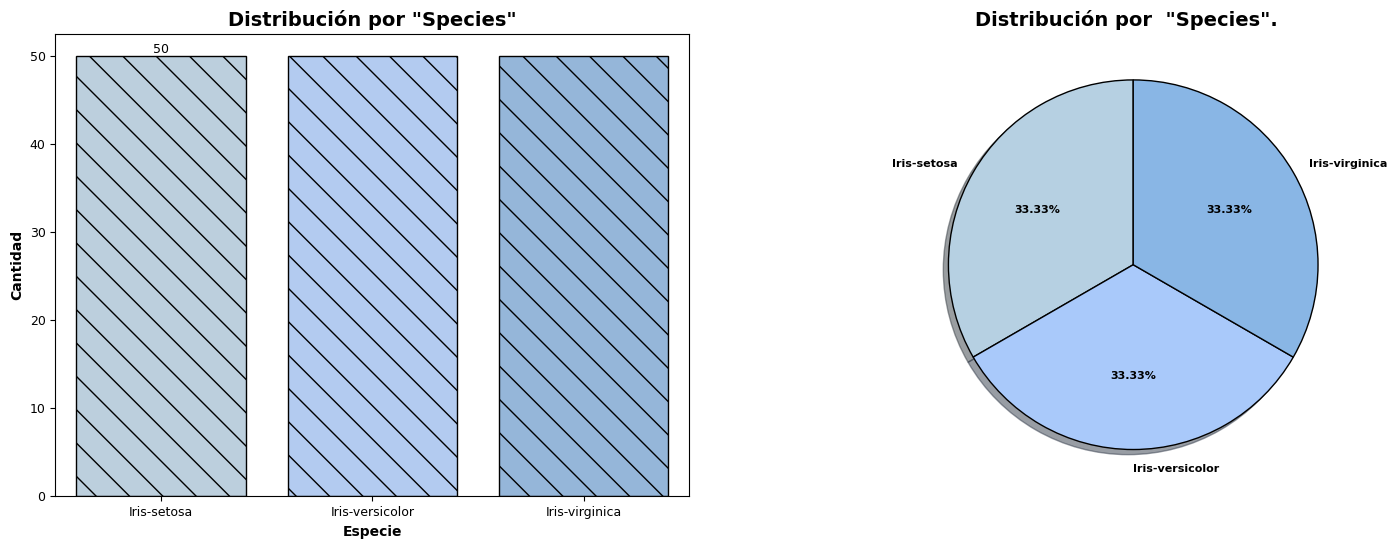

In [10]:
show_category_distribution(df,
                        "Species",
                        colors,
                        bg_color=background_color)

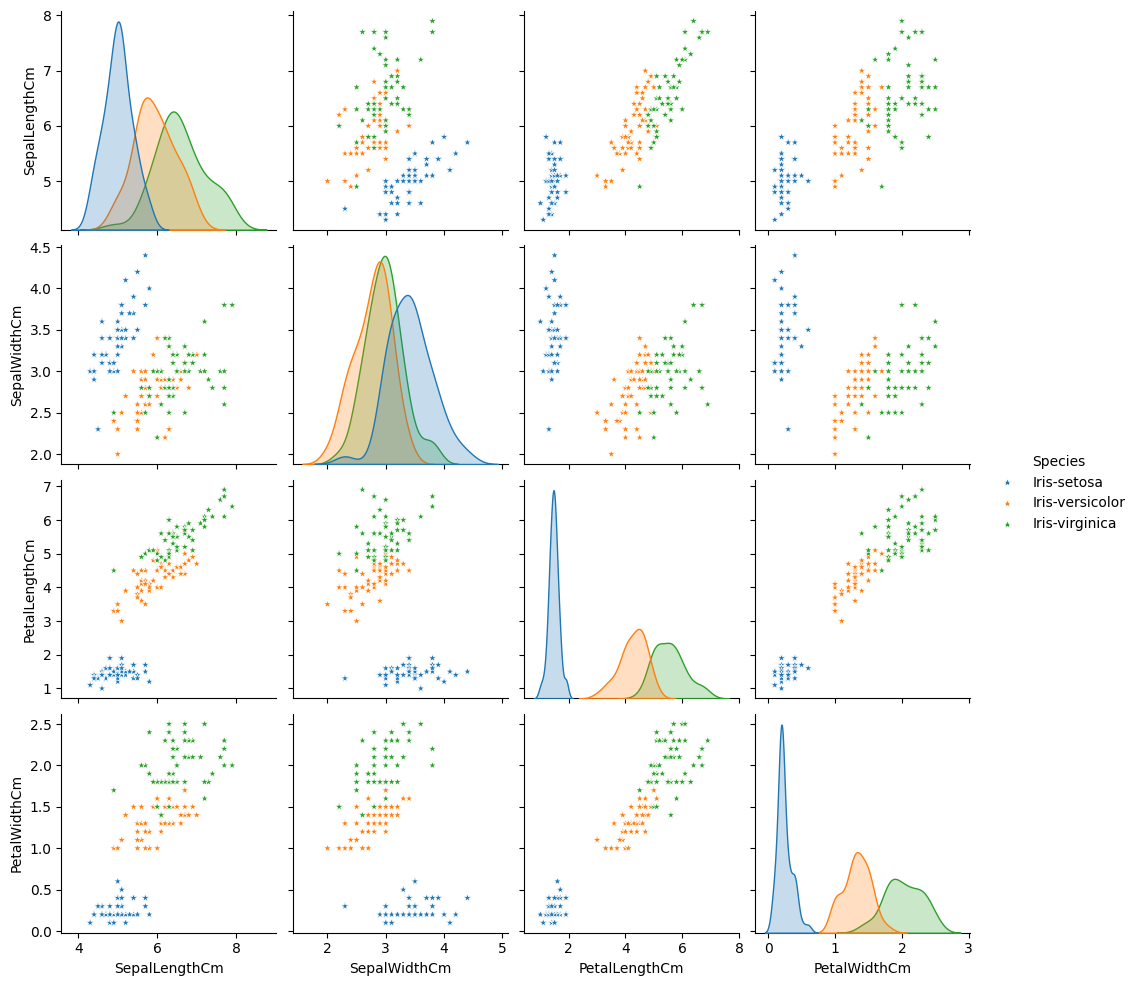

In [11]:
## Utilice Boxplot para comprender las relaciones entre parámetros
_ = sns.pairplot(df, hue='Species', markers='*')
plt.show()

# **PREPARANDO LOS DATOS**

>> ETIQUETA QUE CODIFICA EL OBJETIVO


Dado que los algoritmos solo aceptan datos numéricos, codificaremos la columna 'Species' usando LabelEncoder() de scikit learn.

In [12]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

La normalización de las funciones proporciona un mejor rendimiento. Por lo tanto, he normalizado todas las características escalándolas a 0 media y una unidad de desviación estándar.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Species',axis=1))
X=scaled_df
Y = df['Species'].values
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


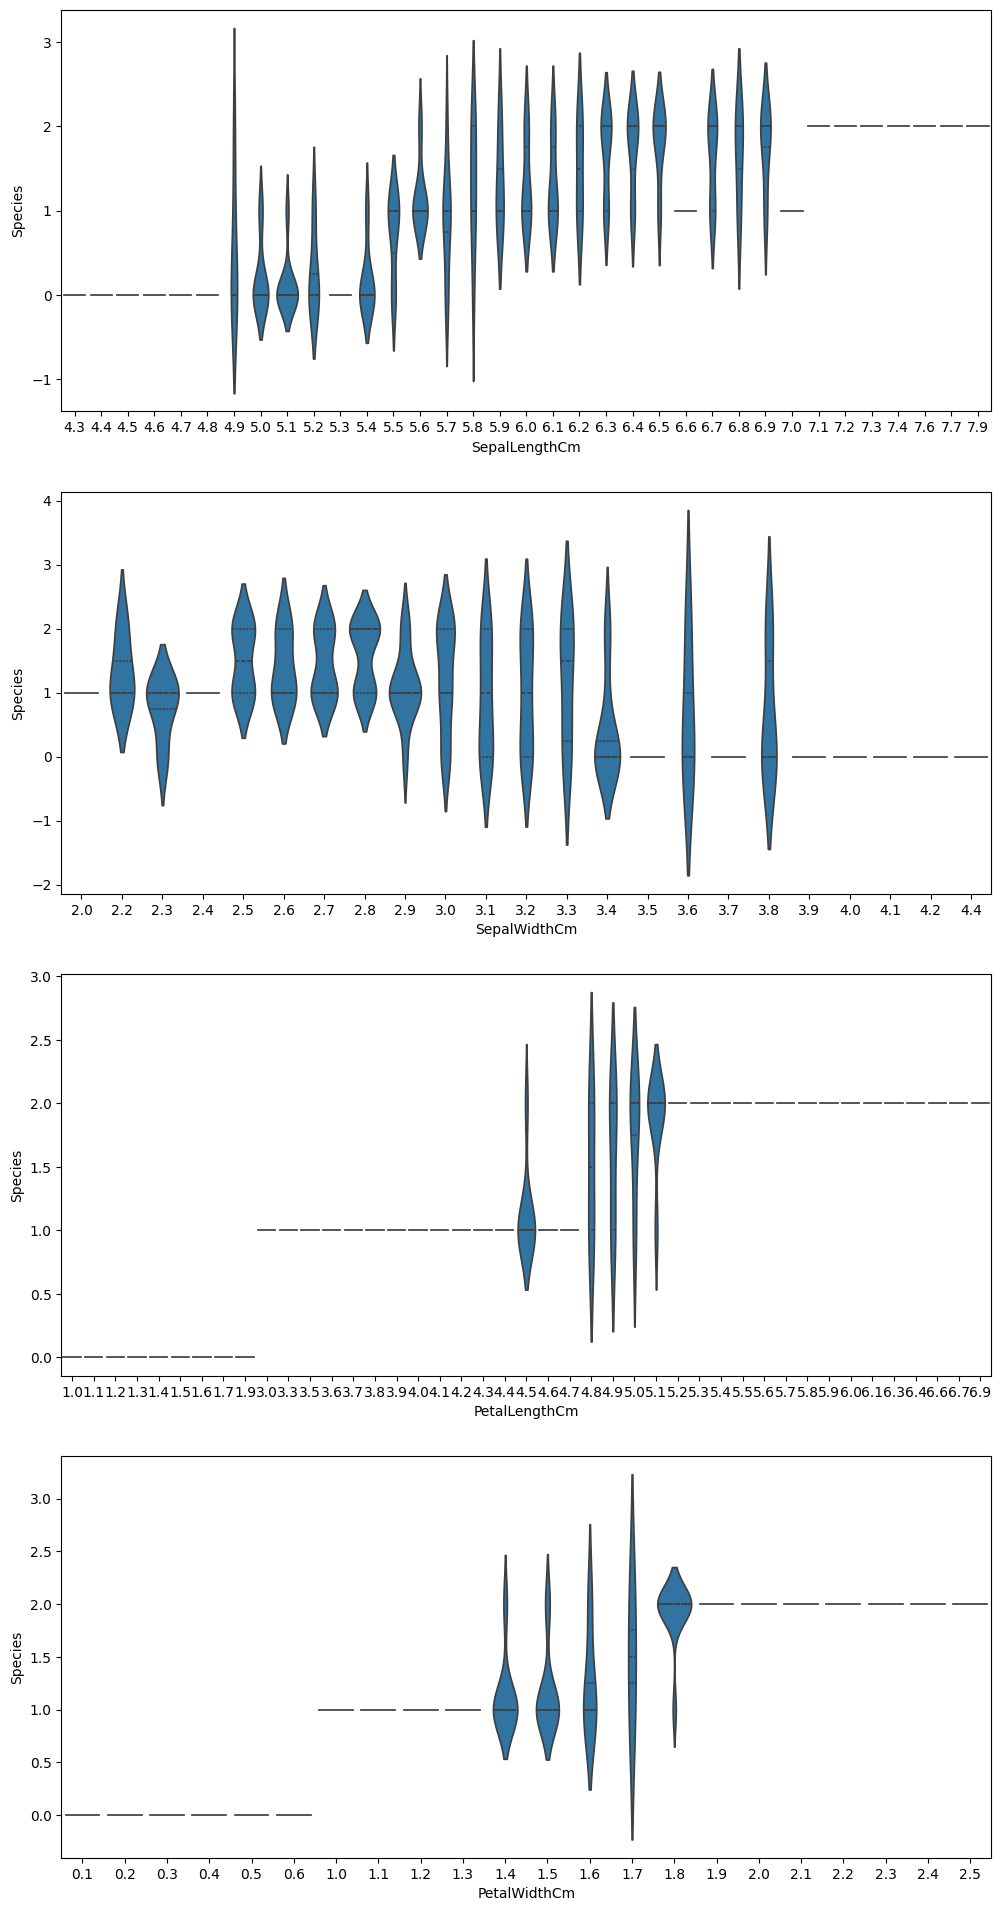

In [41]:
## Este fragmento de código crea un conjunto de subgráficos (en este caso, 4 subgráficos dispuestos en una sola columna)
#que muestran violines para cada una de las cuatro características ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')

fig, axes = plt.subplots(4, 1, figsize=(12,24))
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for idx, col in enumerate(cols):
    _ = sns.violinplot(y='Species', x=col, data=df, inner='quartile', ax = axes[idx])

plt.show()

- Distribución de las características por especie: Los violines muestran la distribución de las características (longitud y ancho de los sépalos y pétalos) para cada especie de iris. Se observa que las diferentes especies tienden a tener diferentes rangos y distribuciones de valores para estas características.

- Sepal vs. Petal: Se observa que las longitudes y anchos de los pétalos tienden a tener una mayor variabilidad entre las especies que las longitudes y anchos de los sépalos.

- Petal Length y Petal Width como características distintivas: La longitud y el ancho de los pétalos parecen ser características distintivas que pueden utilizarse para distinguir entre especies de iris, ya que muestran una mayor variabilidad entre las especies que las características de los sépalos.

- Sepal Width como la característica menos distintiva: La anchura del sépalo parece tener la menor variabilidad entre las especies de iris, lo que indica que puede ser menos útil para diferenciar entre ellas en comparación con otras características.

- Posibles agrupaciones: Se observan posibles agrupaciones distintas en las características de los pétalos, lo que podría indicar la existencia de diferentes subgrupos dentro de las especies de iris.

# **DIVIDIR EN CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

# **MODELADO DE ALGORIRMOS**

>>> MODELO REGRESIÓN LOGÍSTICA

In [16]:
clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [26]:
conf_mat = confusion_matrix(y_test, pred)

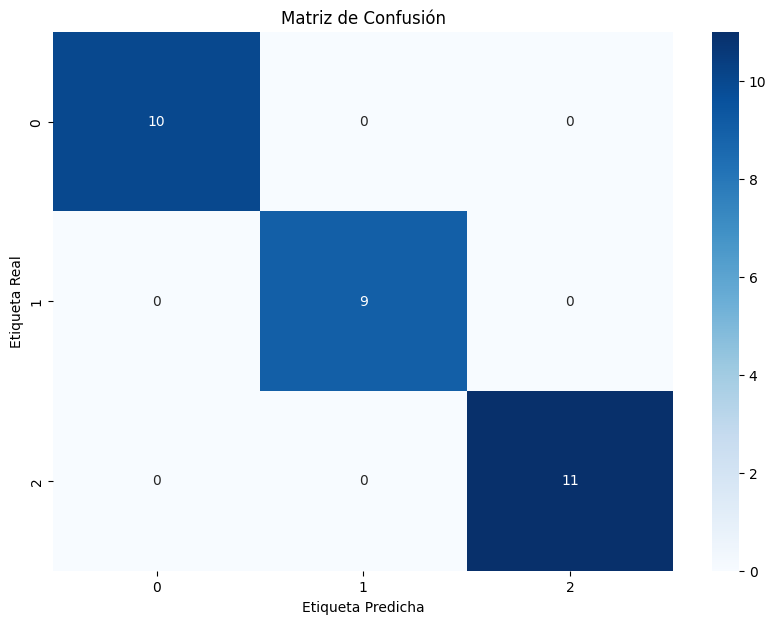

In [27]:
# Visualización de la matriz de confusión con Seaborn - REGRESIÓN LOGÍSTICA
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

>>> MODELO kNN

In [17]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [28]:
conf_mat_knn = confusion_matrix(y_test, pred)

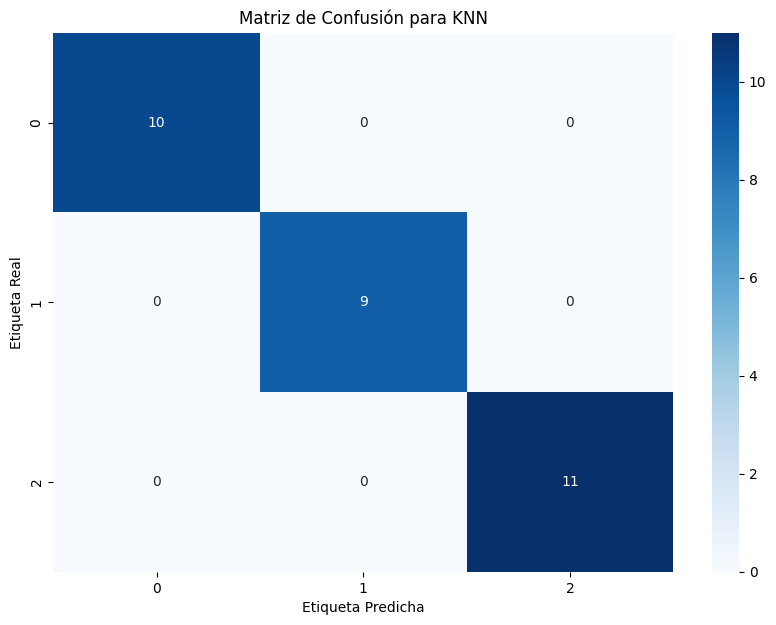

In [29]:
# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para KNN')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

>>> MODELO Linear Support Vector Machine(SVM)


In [18]:
clf_svm_lin=LinearSVC()
clf_svm_lin.fit(x_train,y_train)
pred=clf_svm_lin.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [30]:
conf_mat_svm_lin = confusion_matrix(y_test, pred)

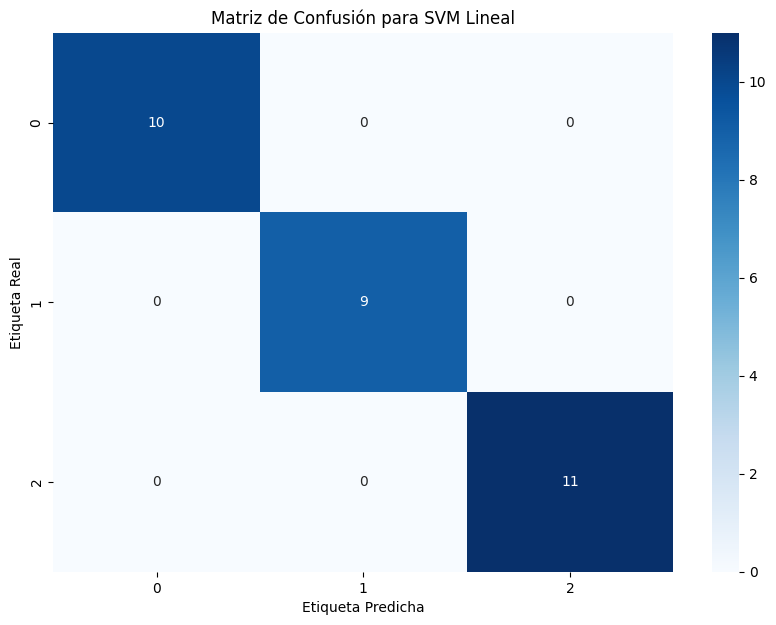

In [31]:
# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_svm_lin, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para SVM Lineal')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

>>> MODELO SVM (with 'rbf' kernel)

In [19]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [32]:
conf_mat_svm = confusion_matrix(y_test, pred)

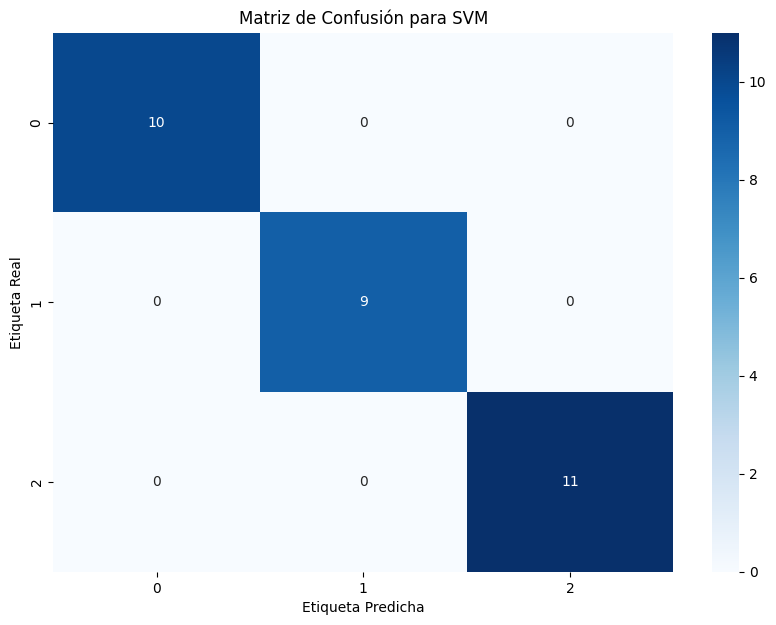

In [33]:
# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# **COMPARANDO LOS ALGORITMOS**

In [23]:
models=[LogisticRegression(),LinearSVC(),SVC(),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))

d={'Algoritmo de modelado':model_names,'Exactitud':acc}

In [24]:
acc_frame=pd.DataFrame(d)
acc_frame

,Algoritmo de modelado,Exactitud
0,LogisticRegression,1.0
1,LinearSVM,1.0
2,rbfSVM,1.0
3,KNearestNeighbors,1.0


In [43]:
X = df.drop('Species', axis = 1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [45]:
clf_model = DecisionTreeClassifier(random_state=42)

clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

print('La precisión del DecisionTreeClasifier en los datos de prueba es', metrics.accuracy_score(y_test, y_pred))

La precisión del DecisionTreeClasifier en los datos de prueba es 0.9666666666666667


In [46]:
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)
y_pred = gaus_model.predict(X_test)


print('La precisión del GaussianNB en los datos de prueba es', metrics.accuracy_score(y_test, y_pred))

La precisión del GaussianNB en los datos de prueba es 0.9666666666666667


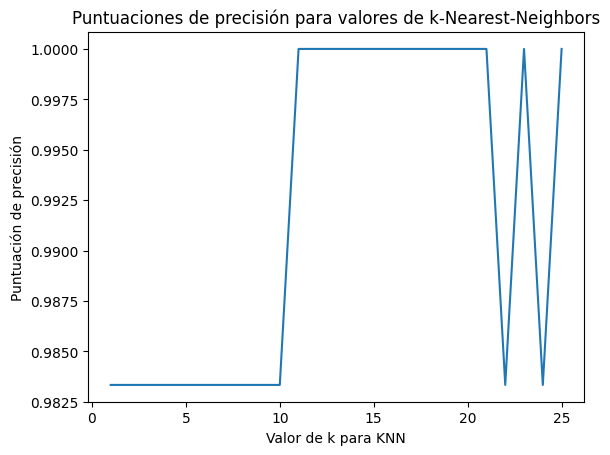

In [47]:
# Experimentando con diferentes valores de n

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Puntuación de precisión')
plt.title('Puntuaciones de precisión para valores de k-Nearest-Neighbors')
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy of the KNN on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the KNN on test data is 1.0


In [49]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)


print('The accuracy of the LinearDiscriminantAnalysis on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the LinearDiscriminantAnalysis on test data is 0.9833333333333333


In [50]:
svm_model = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.score(X_test, y_test)

print('The accuracy of the svm classifier on test data is', y_pred)

The accuracy of the svm classifier on test data is 1.0


In [52]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print('The accuracy of the Logistic regressor on test data is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the Logistic regressor on test data is 1.0


In [53]:
def my_print_and_test_models():

    models = [clf_model, gaus_model, knn, lda_model, svm_model]
    scoring = []

    for model in models:
        scoring.append(cross_val_score(model, X, y, cv = 5))

    models_zip = zip(models, scoring)

    for model, score in models_zip:
        print('%s: %f (%f)' % (model.__class__.__name__ , score.mean(), score.std()))

my_print_and_test_models()

DecisionTreeClassifier: 0.953333 (0.033993)
GaussianNB: 0.953333 (0.026667)
KNeighborsClassifier: 0.966667 (0.029814)
LinearDiscriminantAnalysis: 0.980000 (0.026667)
SVC: 0.980000 (0.016330)
